In [ ]:
import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz

# 1.1.5 Import iris
from sklearn.datasets import load_iris

# 1.1.6
# Install as:
#   conda install -c conda-forge python-graphviz 
#   conda install -c anaconda pydot
import graphviz

# 1.1.7
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

Saving german_credit_data.csv to german_credit_data.csv


In [ ]:
df = pd.read_csv("")

In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df.shape

(1000, 11)

In [ ]:
df.Housing.unique()

array(['own', 'free', 'rent'], dtype=object)

In [ ]:
df.Purpose.unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

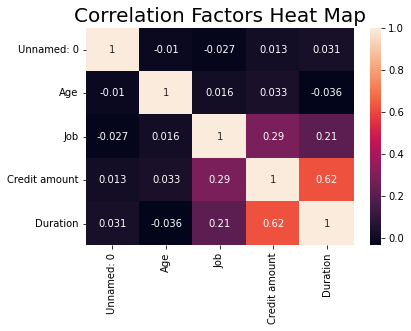

In [ ]:
#to see the correaltion between the various variables
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [ ]:
df['Job'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

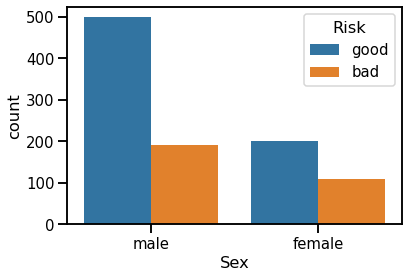

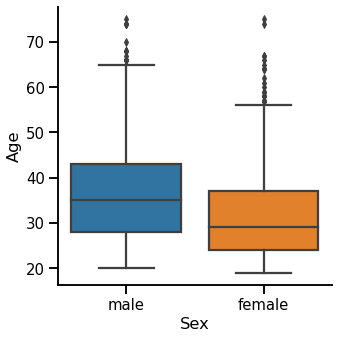

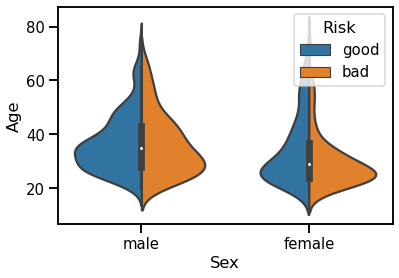

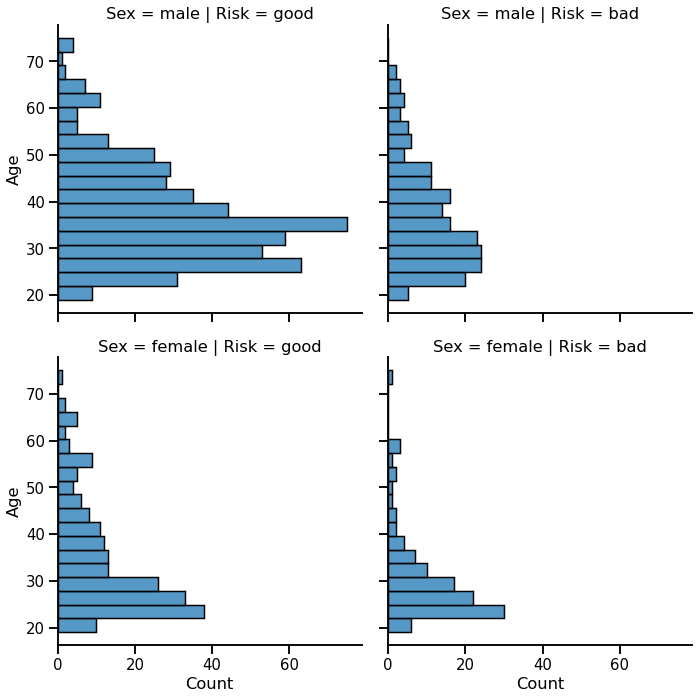

In [ ]:
sns.set_context('talk', font_scale=.9)
# Example of types of analysis that can be done

# Count plot helps us visualize the number of elements per category
sns.countplot(data=df, x='Sex', hue='Risk')
plt.show()

# Box plot helps us see the mean value of a category "Sex" per "Age" in our dataset
sns.catplot(data=df, x='Sex', y='Age', kind='box')
plt.show()

# Split violin plots help us contrast the distribution across a hue value "Risk"
sns.violinplot(data=df, x='Sex', y='Age', hue='Risk', split=True)
plt.show()

# Displot help us visualize the distribution with histograms
sns.displot(data=df, row='Sex', y='Age', col='Risk')
plt.show()

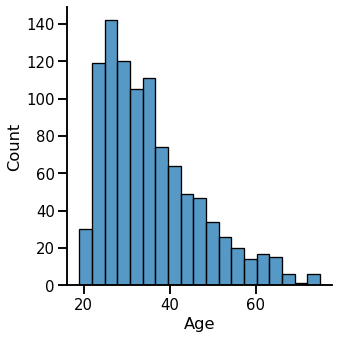

In [ ]:
# Let's see how age is distributed
sns.displot(df['Age'])
plt.show()

#Let us split age into categories
interval = (18, 25, 35, 60, 120)
cats = ['Young Adult', 'Adult', 'Senior', 'Elder']
df["Age_cat"] = pd.cut(df['Age'], interval, labels=cats)

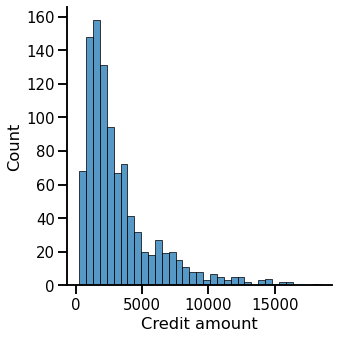

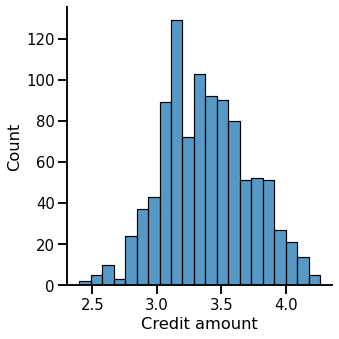

In [ ]:
# Let's see how is credit amount distributed
sns.displot(df['Credit amount'])
plt.show()

# Another way to represent long tail numerical distributions is to transform them
# using e.g., a log function
sns.displot(np.log10(df['Credit amount']))
plt.show()

# Apply the new distribution to the dataset
df['Credit amount'] = np.log10(df['Credit amount'])

In [ ]:
df['Saving accounts'] = df['Saving accounts'].fillna('no_inf')
df['Checking account'] = df['Checking account'].fillna('no_inf')

for missing values above code is as there were around 400 rows with null values this is a large number as compared to the shape of the dataset.

In [ ]:
def one_hot_encoder(df, column_name, exclude_col = False):
    merged_df = df.merge(pd.get_dummies(df[column_name], drop_first=False, prefix=column_name), left_index=True, right_index=True)
    if exclude_col:
        del merged_df[column_name] # Exclude the original column
    return merged_df

In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk',
       'Age_cat'],
      dtype='object')

In [ ]:
df = df.drop('Unnamed: 0', axis='columns')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,67,male,2,own,no_inf,little,3.067815,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,3.774590,48,radio/TV,bad,Young Adult
2,49,male,1,own,little,no_inf,3.321391,12,education,good,Senior
3,45,male,2,free,little,little,3.896636,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,3.687529,24,car,bad,Senior


In [ ]:
df_ready = df.copy()


category_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk'] #'Age_cat']

# Note to DIEGO: Uncomment this line of code to include the age category
category_features = ['Job','Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk', 'Age_cat']

for cat in category_features:
    df_ready = one_hot_encoder(df_ready, cat, exclude_col=True)

In [ ]:
df_ready.columns

Index(['Age', 'Credit amount', 'Duration', 'Job_0', 'Job_1', 'Job_2', 'Job_3',
       'Sex_female', 'Sex_male', 'Housing_free', 'Housing_own', 'Housing_rent',
       'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_no_inf', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_no_inf',
       'Checking account_rich', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Risk_bad', 'Risk_good',
       'Age_cat_Young Adult', 'Age_cat_Adult', 'Age_cat_Senior',
       'Age_cat_Elder'],
      dtype='object')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
dataset_ready_x = df_ready.drop(['Risk_bad', 'Risk_good', 'Age', 'Sex_male'], axis='columns')
X = dataset_ready_x.values
feature_names = dataset_ready_x.columns

y = df_ready['Risk_bad'].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = knn.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[187,  22],
       [ 69,  22]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6966666666666667

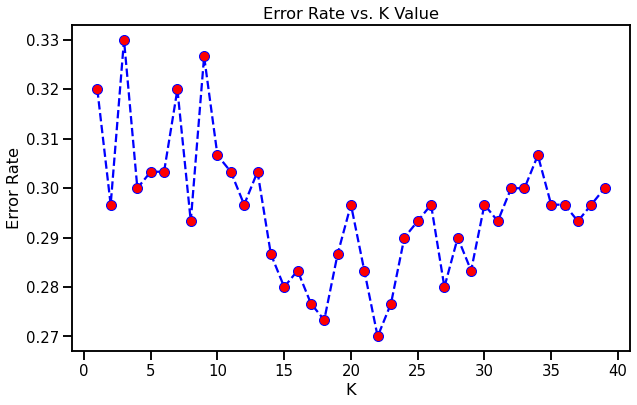

Minimum error:- 0.27 at K = 22


In [ ]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [40]:
knn = KNeighborsClassifier(n_neighbors=22, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=22)

In [41]:
y_pred = knn.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred)

0.73